## VISUALIZE GRAPHS

<Figure size 640x480 with 0 Axes>

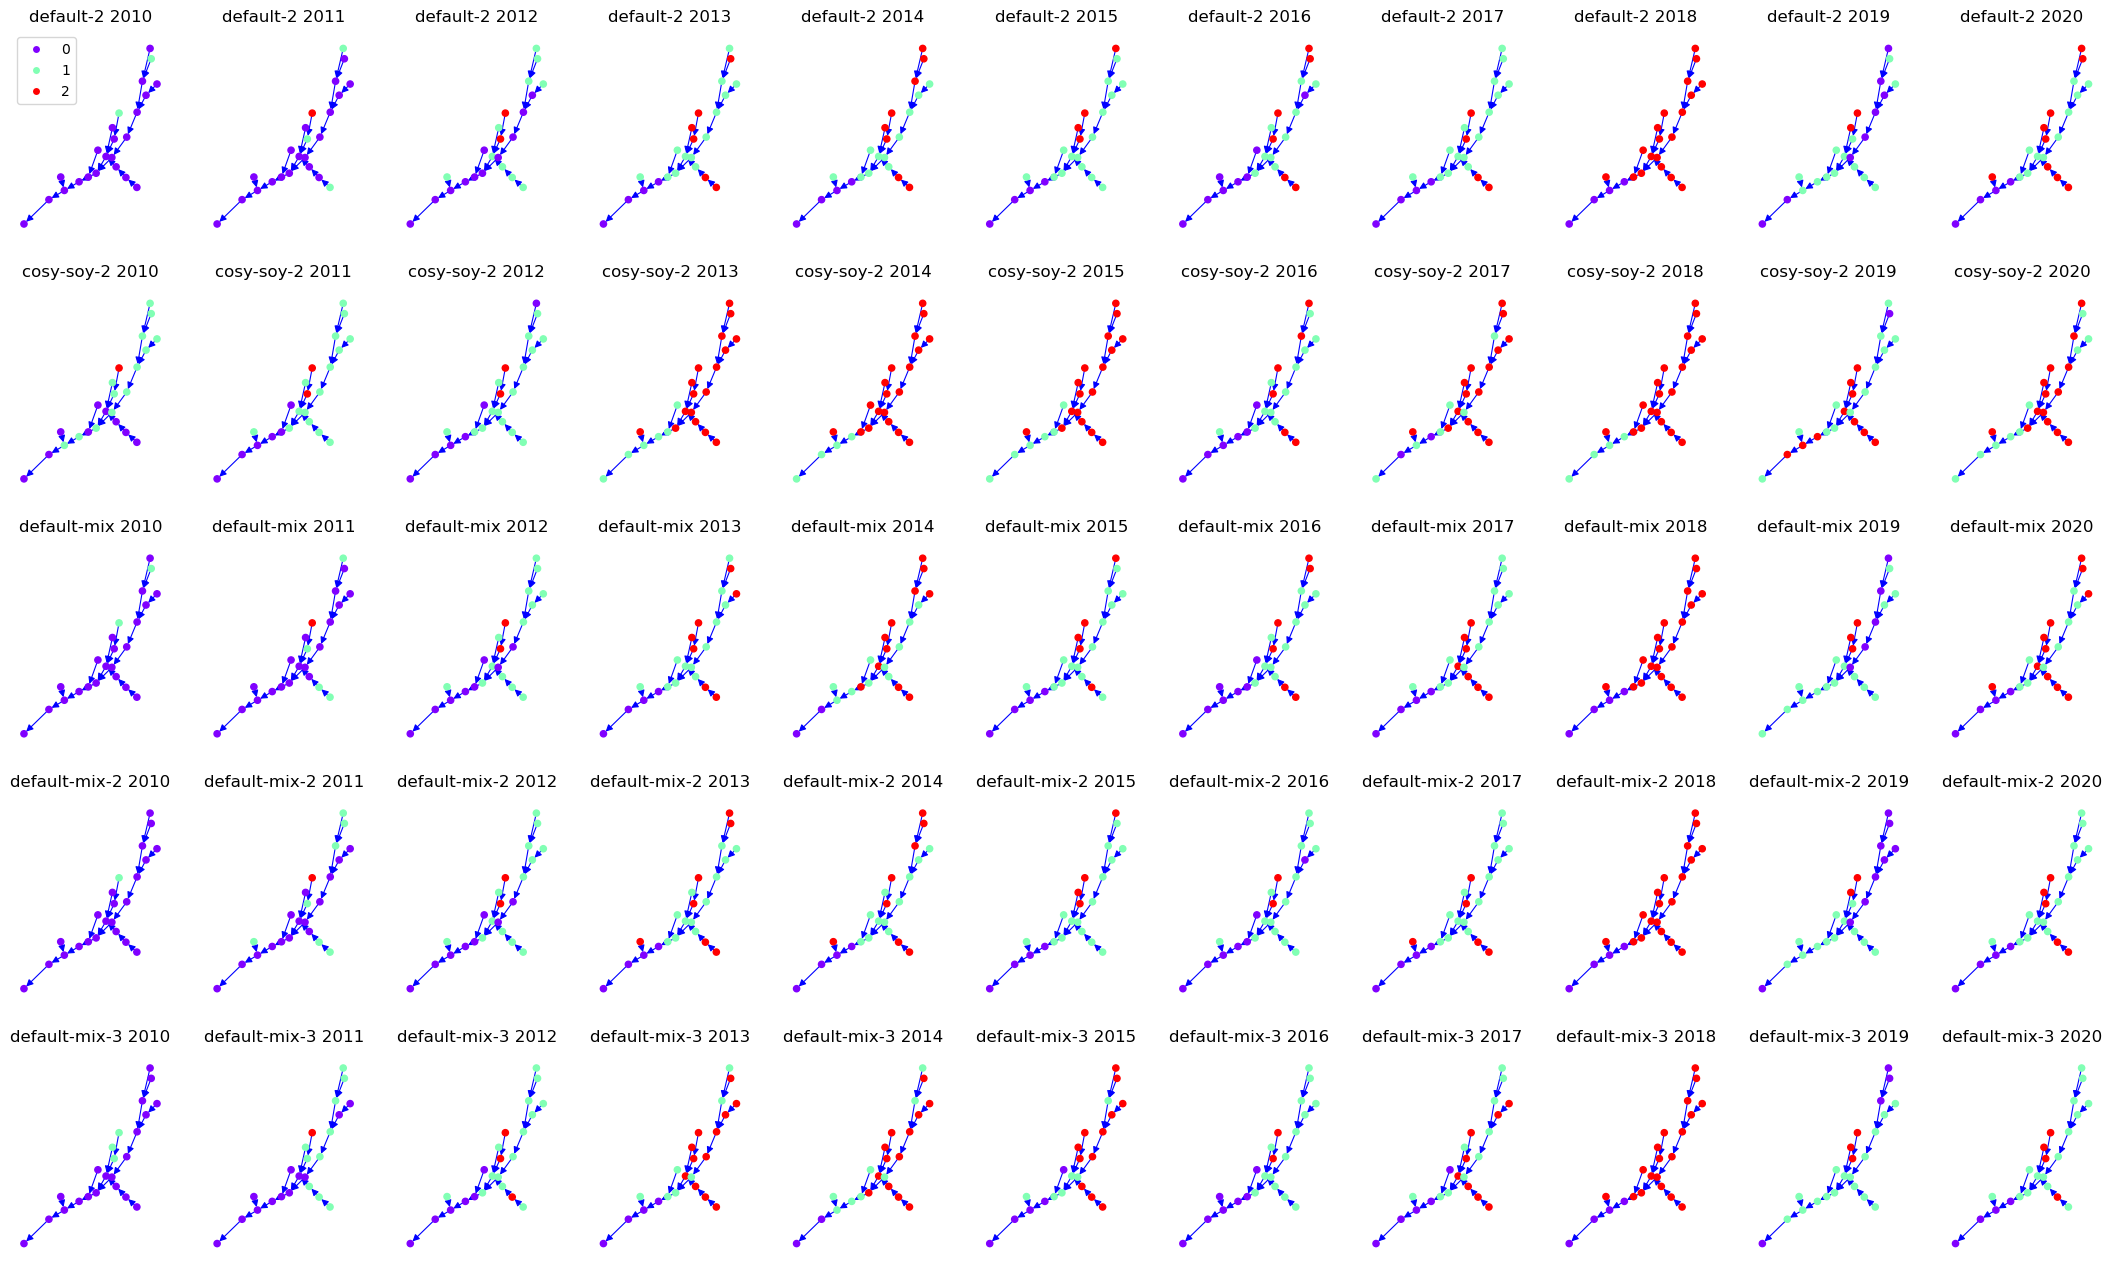

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import networkx as nx
import matplotlib.cm as cm
import pickle
import os
import torch

def plot_ax(G, values, title, num_bins, ax, ix):
    max_value = int(max(values))
    min_value = int(min(values))
    set_values = list(range(min_value, max_value+1))
    color = cm.rainbow(np.linspace(0, 1, num_bins))
    node_colors = []
    for idx, value in enumerate(values):
        node_colors.append(color[int(value)])
    
    pos = nx.spring_layout(G, iterations=100, seed=5)
    nx.draw(G, pos=pos, with_labels=False, node_size=20, node_color=node_colors, edge_color='blue', width=0.8, arrowsize=10, ax=ax)
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color[idx], label=value) for idx, value in enumerate(list(range(num_bins)))]
    if ix == (0, 0):
        ax.legend(handles=handles)
    # ax.axis('equal')
    ax.set_title(title)

with open(os.getcwd()+'/data/train_graphs_all.pkl', 'rb') as f:
    train_graphs = pickle.load(f)
with open(os.getcwd()+'/data/test_graphs_all.pkl', 'rb') as f:
    test_graphs = pickle.load(f)
with open(os.getcwd()+'/data/val_graphs_all.pkl', 'rb') as f:
    val_graphs = pickle.load(f)

# scenarios = ["default-2", "soy-3", "corn-3", "pasture-3", 'cosy-3', "pasture-corn", "soy-corn-2", "cosy-corn-2", "pasture-soy-2", "pasture-cosy-2", "cosy-soy-2", "default-mix", "default-mix-2", "default-mix-3"]
scenarios = ["default-2", "cosy-soy-2", "default-mix", "default-mix-2", "default-mix-3"]

fig = plt.figure(); plt.clf()
fig, ax = plt.subplots(len(scenarios), len(list(range(2010, 2021))), figsize=(27, 16))
main_nodes = range(1, train_graphs[0][0]['sub'].x.shape[0]+1)

years = list(range(2010, 2021))
counter = 0
for s, scenario in enumerate(scenarios):
    for yc, year in enumerate(years):
        for idx, (graph, G, y, m) in enumerate(test_graphs+train_graphs+val_graphs):
            if graph.scenario == scenario and y == year:
                sub_graph = G.subgraph(main_nodes)
                ix = np.unravel_index(counter, ax.shape)
                counter += 1
                plot_ax(sub_graph, graph['sub'].y.cpu().detach().numpy(), f"{graph.scenario} {y}", 3, ax[ix], ix)

